<h4>Lab No 7</h4>
<h4 align="right">Utkarsh Bhangale<br>2020802124<br></h4>

In [1]:
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 322727, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 322727 (delta 28), reused 46 (delta 11), pack-reused 322631
Receiving objects: 100% (322727/322727), 510.52 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (224894/224894), done.
Updating files: 100% (7241/7241), done.


In [6]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

A. Edge Detection using Prewitt filter

Read the image data.


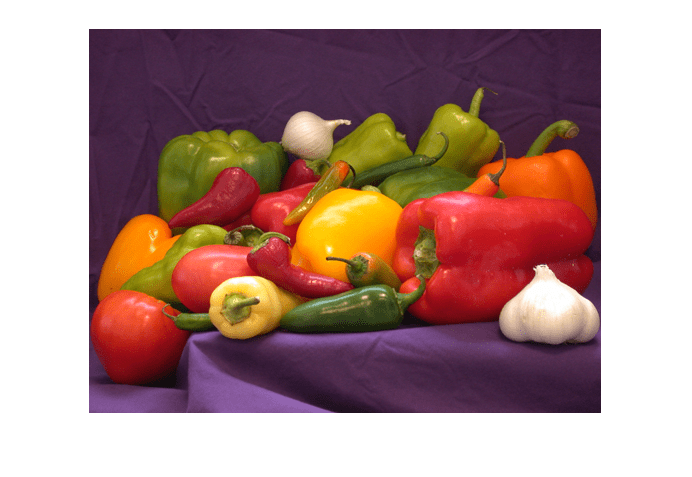

In [7]:
image = cv2.imread("/content/Vegetable Image.png")
cv2_imshow(image)

 Convert the image into a grayscale.


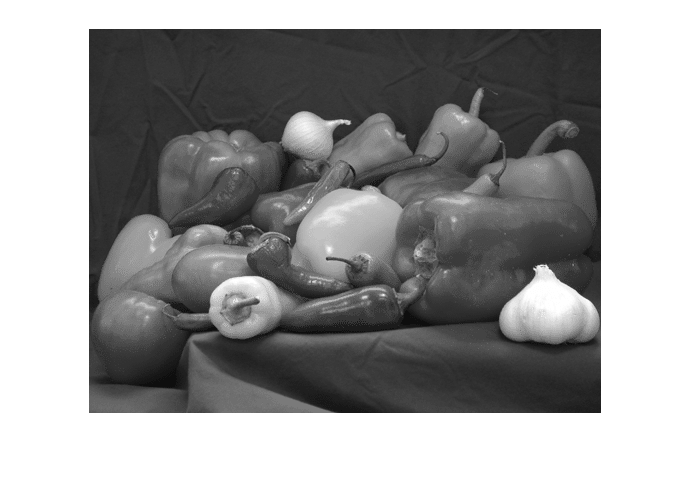

In [8]:
greyImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(greyImage)

 Perform Prewitt operation for horizontal mask

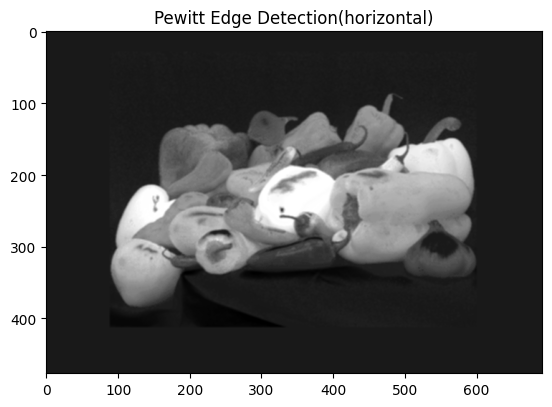

In [9]:
import numpy as np

# Pewitt mask for horizontal edges
pewitt_mask_h = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])

def pewitt_h(image):

  # Get height and width of image
  height, width = image.shape[:2]

  # Create output image to store results
  output = np.zeros((height,width), dtype=np.int32)

  # Loop through each pixel
  for i in range(1,height-1):
    for j in range(1,width-1):

      # Get neighborhood of pixel
      neighborhood = image[i-1:i+2, j-1:j+2]

      # Convolve mask on neighborhood
      output[i,j] = np.sum(neighborhood * pewitt_mask_h)

  return output
import matplotlib.pyplot as plt

output = pewitt_h(image)

plt.imshow(output, cmap='gray')
plt.title('Pewitt Edge Detection(horizontal)')

plt.show()

 Perform Prewitt operation for Vertical mask

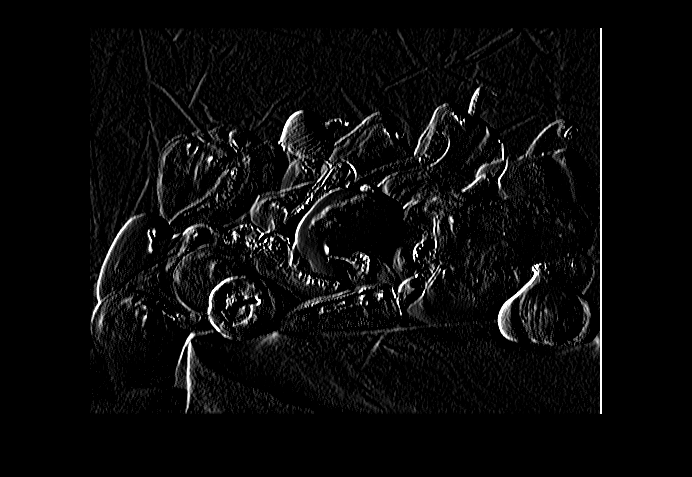

In [10]:
import cv2
import numpy as np

# Pewitt mask for vertical edges
pewitt_mask_v = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

def pewitt_v(image):

  height, width = image.shape[:2]

  output = np.zeros((height,width), dtype=np.int32)

  for i in range(1,height-1):
    for j in range(1,width-1):

      neighborhood = image[i-1:i+2, j-1:j+2]

      output[i,j] = np.sum(neighborhood * pewitt_mask_v)

  return output

# Read image
img = cv2.imread('image.jpg',0)

edges = pewitt_v(image)

cv2_imshow(edges)

Provide a single output for the input image

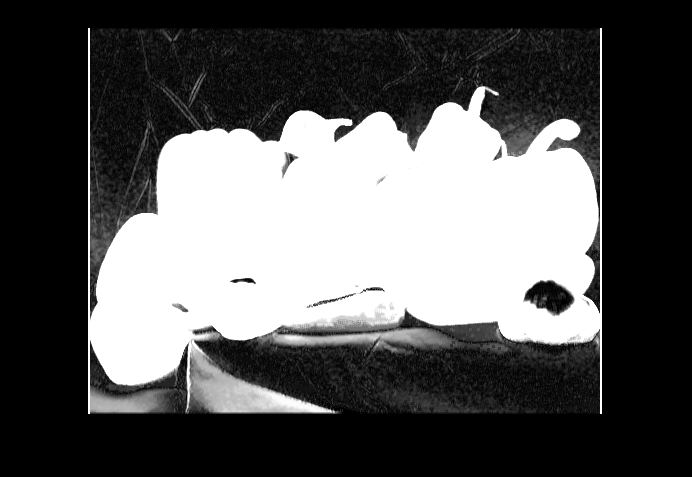

In [11]:
# Pewitt masks
# Define filter functions
def pewitt_h(img):
  pewitt_ho = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  height, width = img.shape[:2]
  output = np.zeros((height,width), np.int32)

  for i in range(1,height-1):
    for j in range(1,width-1):

      neighborhood = img[i-1:i+2, j-1:j+2]

      output[i,j] = np.sum(neighborhood * pewitt_ho)

  return output

def pewitt_v(img):
  pewitt_ve = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
  height, width = img.shape[:2]
  output = np.zeros((height,width), np.int32)

  for i in range(1,height-1):
    for j in range(1,width-1):

      neighborhood = img[i-1:i+2, j-1:j+2]

      output[i,j] = np.sum(neighborhood * pewitt_ve)

  return output

def pewitt(img):

  h_edges = pewitt_h(img)
  v_edges = pewitt_v(img)

  h_edges = np.absolute(h_edges)
  v_edges = np.absolute(v_edges)

  mag = np.sqrt(np.power(h_edges,2) + np.power(v_edges,2))

  return mag

# Apply filters
edges = pewitt(image)

# Display output
cv2_imshow(edges)

B. Canny edge detection.

Applying Gaussian blur filter to smooth data.


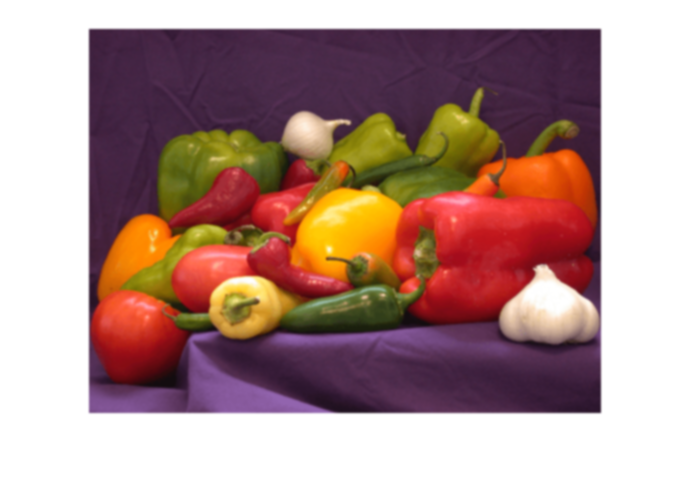

In [12]:
# Define the kernel size for the Gaussian blur (the larger the kernel, the stronger the blur)
kernel_size = (5, 5)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, kernel_size, 0)

cv2_imshow(blurred_image)

Canny edge detection.

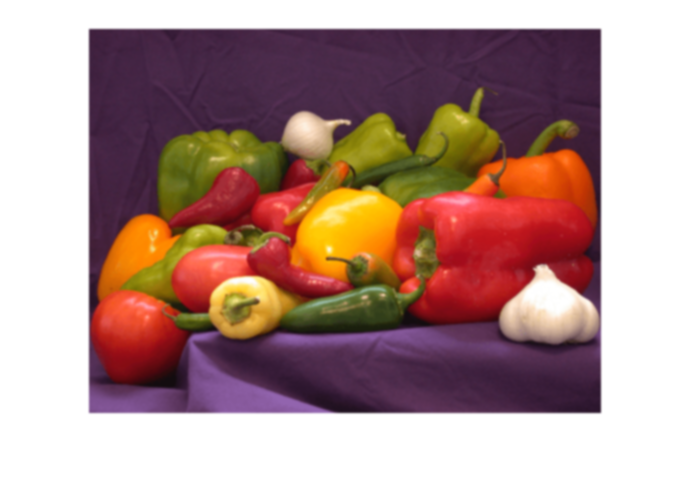

In [ ]:
buurred_img = cv2.GaussianBlur(image,(5,5),0)
cv2_imshow(buurred_img)

Apply the Sobel filter to get the intensity and edge direction matrices

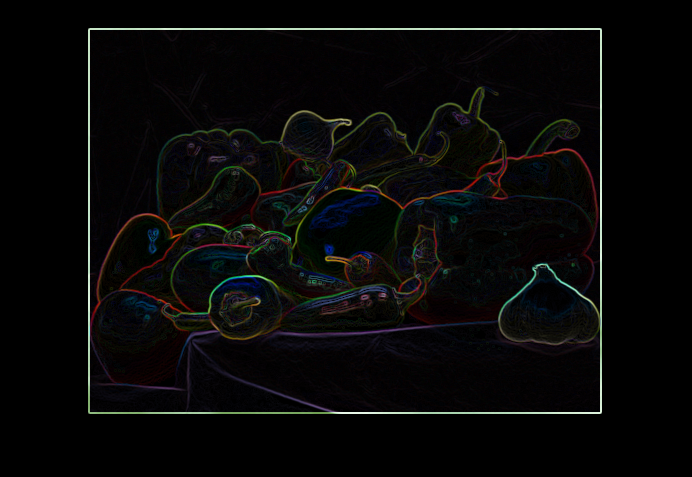

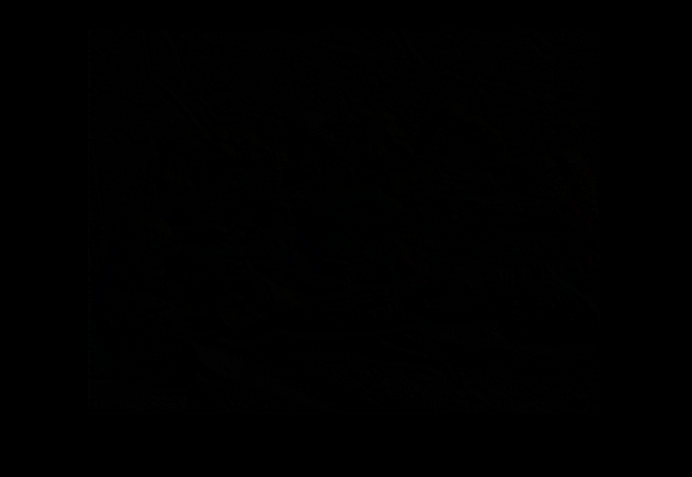

In [15]:
# Apply Sobel filter to get the gradient in the X and Y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude and angle of the gradient
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
angle = np.arctan2(sobel_y, sobel_x)

# Optionally, you can normalize the magnitude to the range [0, 255]
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Save the intensity and edge direction matrices as images
cv2.imwrite('sobel_intensity.jpg', magnitude)
cv2.imwrite('sobel_edge_direction.jpg', angle)

# Display the intensity and edge direction images
cv2_imshow(magnitude)
cv2_imshow(angle)

Identify the thick and thin edges


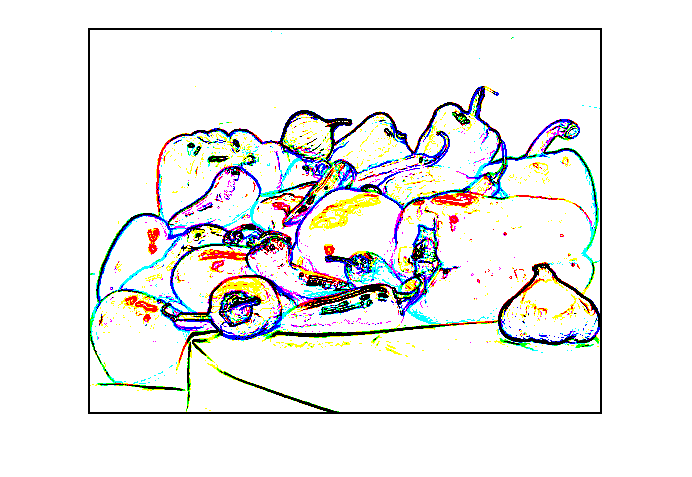

In [20]:
# Apply a threshold to the magnitude image to create a binary edge map
threshold_value = 20  # Adjust this value as needed
ret, binary_edge_map = cv2.threshold(magnitude, threshold_value, 255, cv2.THRESH_BINARY)

# Optionally, invert the binary image to have white edges on a black background
binary_edge_map_thick = cv2.bitwise_not(binary_edge_map)

# Save the binary edge map
cv2_imshow(binary_edge_map_thick)


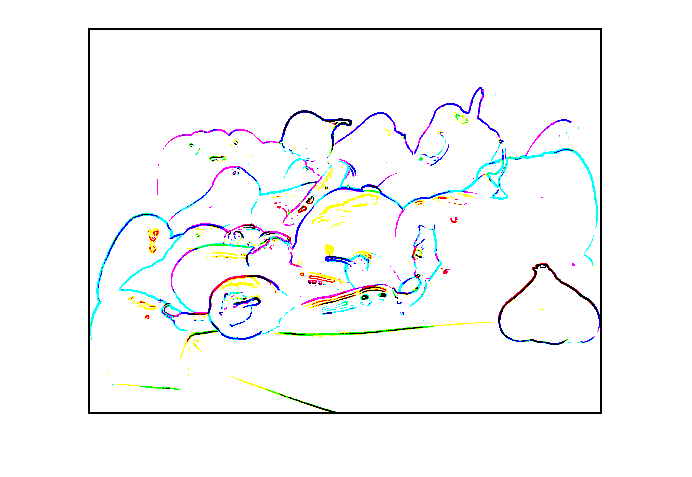

In [21]:
# Apply a threshold to the magnitude image to create a binary edge map
threshold_value = 50  # Adjust this value as needed
ret, binary_edge_map = cv2.threshold(magnitude, threshold_value, 255, cv2.THRESH_BINARY)

# Optionally, invert the binary image to have white edges on a black background
binary_edge_map_thin = cv2.bitwise_not(binary_edge_map)

# Save the binary edge map
cv2_imshow(binary_edge_map_thin)


Apply non-Max Suppression to thin the edges

<ipython-input-47-f200b29d5d69>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  gx = image[x, y + 1] - image[x, y - 1]
<ipython-input-47-f200b29d5d69>:16: RuntimeWarning: overflow encountered in ubyte_scalars
  gy = image[x - 1, y] - image[x + 1, y]


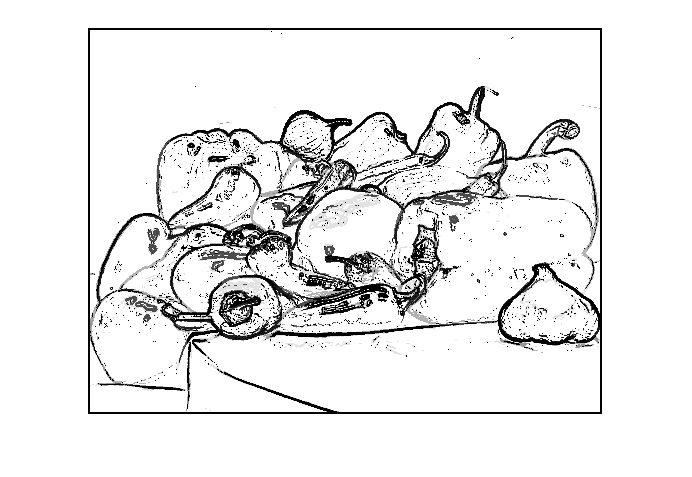

In [47]:
# Load the thin edges (binary image)
thin_edges = cv2.cvtColor(binary_edge_map_thick, cv2.COLOR_BGR2GRAY)

# Apply non-maximum suppression
def non_max_suppression(image, angle):
    h, w = image.shape
    suppressed = np.copy(image)

    # Iterate through each pixel
    for x in range(1, h - 1):
        for y in range(1, w - 1):
            mag = image[x, y]

            # Calculate the gradient direction angle
            gx = image[x, y + 1] - image[x, y - 1]
            gy = image[x - 1, y] - image[x + 1, y]
            angle_rad = np.arctan2(gy, gx)
            angle_deg = (angle_rad * 180.0) / np.pi

            # Ensure the angle is in the range [0, 180]
            angle_deg = (angle_deg + 180) % 180

            # Determine the direction of the gradient at the current pixel
            if (0 <= angle_deg < 22.5) or (157.5 <= angle_deg <= 180):
                q1 = image[x, y + 1]
                q2 = image[x, y - 1]
            elif (22.5 <= angle_deg < 67.5):
                q1 = image[x - 1, y + 1]
                q2 = image[x + 1, y - 1]
            elif (67.5 <= angle_deg < 112.5):
                q1 = image[x - 1, y]
                q2 = image[x + 1, y]
            else:  # (112.5 <= angle_deg < 157.5)
                q1 = image[x - 1, y - 1]
                q2 = image[x + 1, y + 1]

            # Suppress non-maximum values
            if (mag < q1) and (mag < q2):
                suppressed[x, y] = 0

    return suppressed

# Apply non-maximum suppression
suppressed_edges = non_max_suppression(thin_edges, angle)

# Save and display the suppressed edges
cv2_imshow(suppressed_edges)


Apply Double Threshold to find Strong, Weak and Non-relevant pixels.


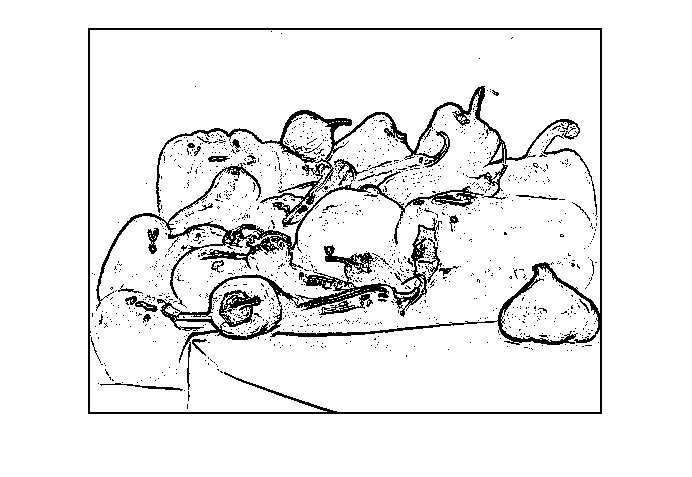

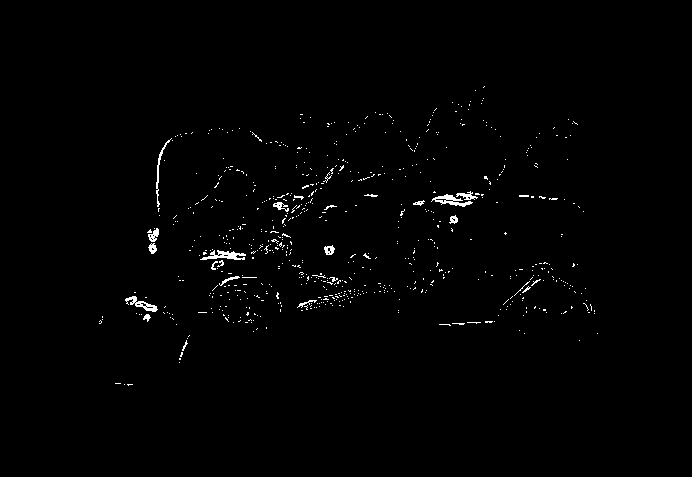

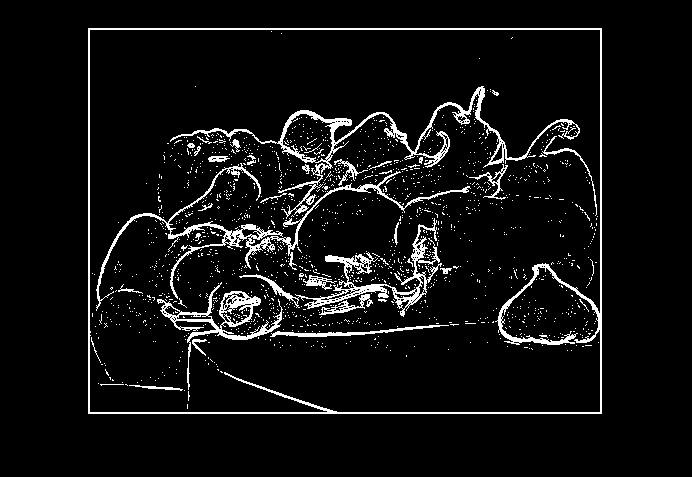

In [50]:
import cv2
import numpy as np

# Ensure 'suppressed_edges' is not None
if suppressed_edges is not None:
    # Define high and low threshold values
    high_threshold = 100  # Adjust this value as needed
    low_threshold = 30   # Adjust this value as needed

    # Create three different threshold masks for strong, weak, and non-relevant pixels
    strong_edges = np.zeros_like(suppressed_edges)
    weak_edges = np.zeros_like(suppressed_edges)
    non_relevant = np.zeros_like(suppressed_edges)

    # Apply double thresholding
    strong_edges[suppressed_edges >= high_threshold] = 255
    weak_edges[(suppressed_edges >= low_threshold) & (suppressed_edges < high_threshold)] = 255
    non_relevant[suppressed_edges < low_threshold] = 255

    # Save the strong, weak, and non-relevant edges
    cv2.imwrite('strong_edges.jpg', strong_edges)
    cv2.imwrite('weak_edges.jpg', weak_edges)
    cv2.imwrite('non_relevant_edges.jpg', non_relevant)

    # Display the strong, weak, and non-relevant edges
    cv2_imshow(strong_edges)
    cv2_imshow(weak_edges)
    cv2_imshow(non_relevant)
else:
    print("Error: Failed to load suppressed_edges")


Perform edge tracking hysteresis to convert weak pixels into the stronger pixel. 8. Provide the
output image.

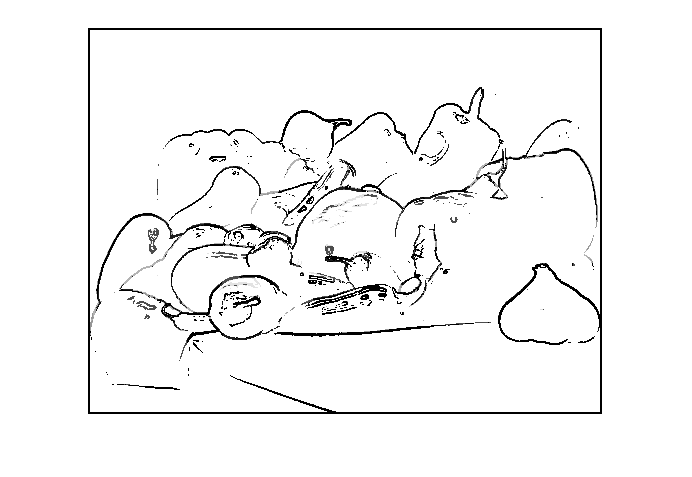

In [54]:
# Load the strong and weak edges obtained from double thresholding
strong_edges = cv2.cvtColor(binary_edge_map_thick, cv2.COLOR_BGR2GRAY)
weak_edges = cv2.cvtColor(binary_edge_map_thin, cv2.COLOR_BGR2GRAY)

# Define a connectivity kernel (8-connectivity)
connectivity_kernel = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]], dtype=np.uint8)

# Perform edge tracking by hysteresis
def edge_tracking_hysteresis(strong_edges, weak_edges):
    # Create an output image and initialize it with strong edges
    output_image = np.copy(strong_edges)

    # Find weak edge pixels
    weak_indices = np.where(weak_edges == 255)

    # Iterate through weak edge pixels and check for connectivity with strong edges
    for i in range(len(weak_indices[0])):
        x, y = weak_indices[0][i], weak_indices[1][i]

        # Check if any of the neighboring pixels in the connectivity kernel are strong edges
        x_start, x_end = max(0, x - 1), min(strong_edges.shape[0], x + 2)
        y_start, y_end = max(0, y - 1), min(strong_edges.shape[1], y + 2)

        if np.sum(output_image[x_start:x_end, y_start:y_end] * connectivity_kernel[:x_end - x_start, :y_end - y_start]) > 0:
            output_image[x, y] = 255

    return output_image

# Apply edge tracking by hysteresis
output_image = edge_tracking_hysteresis(strong_edges, weak_edges)


# Save and display the output image
cv2.imwrite('output_image.jpg', output_image)
cv2_imshow(output_image)

C. Laplacian of Gaussian


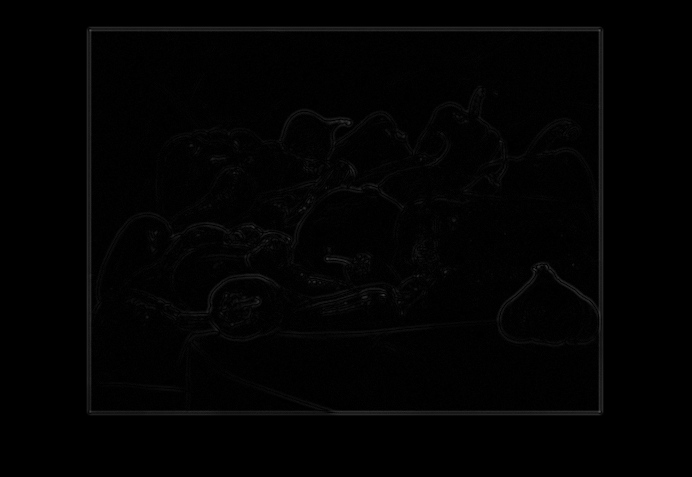

In [56]:
# Apply Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# Apply Laplacian operator to the grayscale image
laplacian_image = cv2.Laplacian(grayscale_image, cv2.CV_64F)
laplacian_image = np.uint8(np.absolute(laplacian_image))

# Display the Laplacian image
cv2_imshow(laplacian_image)

## **Perform and comparison between Gradient-based and Gaussian-based operators**
 Gradient-based and Gaussian-based operators are both commonly used for edge detection in image
 processing. Each method has its own advantages and is suitable for different scenarios. Here's a comparison
 of the two approaches:
 1. Gradient-based operators:
 Examples include Sobel, Prewitt, and Roberts operators.
 They calculate the gradient of the image intensity at each pixel, highlighting regions of rapid intensity
 change.
 They are sensitive to noise and can produce thick edges, leading to a less precise localization of
 edges.
 These operators are computationally less expensive compared to Gaussian-based operators.
 They are effective for real-time applications where speed is crucial.
 2. Gaussian-based operators:
 Examples include the Laplacian of Gaussian (LoG) and the Difference of Gaussian (DoG) operators.
 They involve convolving the image with a Gaussian kernel to smooth the image and reduce noise.
 They detect edges by identifying zero-crossings in the second derivative of the smoothed image.
 They are less sensitive to noise compared to gradient-based operators, resulting in more accurate
 edge localization.
 These operators are computationally more expensive due to the convolution with the Gaussian
 kernel.
 When to use which:
 Use gradient-based operators when real-time processing is required and when the presence of noise is
 not significant.
 Use Gaussian-based operators when accurate edge localization is crucial, especially in cases where the
 image contains a considerable amount of noise.
 In practice, the choice between the two approaches depends on the specific requirements of the application
 and the characteristics of the images being processed. It is often beneficial to experiment with both methods
 and choose the one that yields the best results for a particular task